In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

def run_gradboost_boot(maxdegree = 10, boot_model = None, n = 100, lr = 1.):
        
    degrees = range(1, maxdegree)
    error, bias, variance = [],[],[]
  
    mse_list, bias_list, var_list = {}, {}, {}
    
    for i in degrees:
        gradboost_model = GradientBoostingRegressor(max_depth = i, n_estimators = n, learning_rate = lr) 
        
        t_tilde, t_pred = boot_model.simulate(gradboost_model)
        mse, bias, var  = boot_model.decompose(t_pred)

        mse_list[i]  = mse
        bias_list[i] = bias
        var_list[i]  = var 
        
    plt.xlim(1, maxdegree - 1)
    plt.style.use("seaborn-darkgrid")
    plt.title('Bias-variance tradeoff for Gradient Boosting')
    plt.xlabel('Nr of degrees'); plt.ylabel('Error/Bias/Variance')
    plt.plot(degrees, mse_list.values(),  c = 'blue'  , label = 'Error')
    plt.plot(degrees, bias_list.values(), c = 'orange', label = 'bias')
    plt.plot(degrees, var_list.values(),  c = 'green' , label = 'Variance')
    plt.legend(loc='best')
    plt.savefig('gradboost_lr_001_final.png')
    
    return mse_list, bias_list, var_list

random:  False steps:  20 steplength:  0.05
(20, 20) (20, 20)


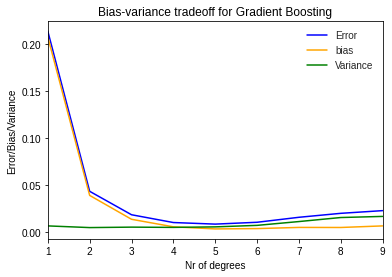

In [3]:
import frankefunction as fr
from bootstrap import *

z = fr.Franke(0, 0.2)
z_noisy, xx, yy = z.franke_function(random = False, precision = 0.05, noise = False) 
print(xx.shape, yy.shape)

boot = Bootstrap(xx, yy, z_noisy, seed = None, scale_target=True)

mse_linreg, bias_linreg, var_linreg = run_gradboost_boot(maxdegree = 10, boot_model = boot, n = 100, lr = 0.1) 